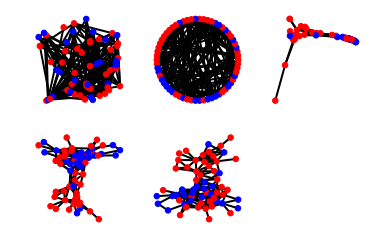

cantidad de delfines machos: 34
cantidad de delfines hembras: 24
cantidad total de delfines: 62
Cantidad de enlaces diferentes: 63
Cantidad total de enlaces: 159


In [2]:
# Cargamos los archivos de datos sobre los delfines, tanto la red como la información de género de los delfines.

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('dolphins.gml')

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata('dolphinsGender.txt')

# Ahora vamos a incorporar el dato de género al objeto que contiene la red

for dolph in a:
    G.nodes[dolph[0]]['Gender'] = dolph[1]
    
# Luego tenemos que graficar las redes para diferentes layouts. De estos me parece que el más apropiado es el cuarto, porque
# muestra mejor la segregación de los delfines por género.

options = {
     'node_color':["blue" if Gender=="f" else "red" for Gender in nx.get_node_attributes(G, "Gender").values()],
     'node_size': 30,
     'width': 2,
}
plt.subplot(231)
nx.draw_random(G, **options)
plt.subplot(232)
nx.draw_circular(G, **options)
plt.subplot(233)
nx.draw_spectral(G, **options)
plt.subplot(234)
nx.draw_spring(G, **options)
plt.subplot(235)
nx.draw_kamada_kawai(G, **options)
plt.show()

# Acá estamos sacando la cuenta de cuántos delfines de cada género existen. La diferencia de 4 delfines entre el total y
# la suma de los generos se debe a los cuatro delfines que no tienen un género asignado.

counter_m = 0
counter_f = 0

for line in a:
    if line[1] == 'm':
        counter_m = counter_m +1
    else: 
        if line[1] == 'f':
            counter_f = counter_f +1

print('cantidad de delfines machos: '+str(counter_m))
print('cantidad de delfines hembras: '+str(counter_f))
print('cantidad total de delfines: '+str(len(a)))

# A continuación vamos a determinar cuántos enlaces de tipo inter-género existen entre los delfines de la red

contad_diff = 0
c = dict(G.edges)

for line in c:
    if G.nodes[line[1]] != G.nodes[line[0]]:
        G.edges[line[0],line[1]]['T_enl'] = 'diff'
        contad_diff= contad_diff +1
    else:
        G.edges[line[0],line[1]]['T_enl'] = 'eq'
        
print('Cantidad de enlaces diferentes: '+str(contad_diff))
print('Cantidad total de enlaces: '+str(len(c)))


In [3]:
# Vamos a definir una función que asigna el género al azar y luego calcula la cantidad de enlaces intergénero que quedan 
# formados. El resultado que devuelve es la cantidad de enlaces.

import random

def GeneroAzar(a):
    b = a
    for num in b:
        num[1]='f'
    indices_m = random.sample(range(62), 34)
    for num in indices_m:
        b[num][1] = 'm'
       
    for dolph in b:
        G.nodes[dolph[0]]['Gender'] = dolph[1]
    
    contad_diff = 0
    c = dict(G.edges)
    for line in c:
        if G.nodes[line[1]] == G.nodes[line[0]]:
            G.edges[line[0],line[1]]['T_enl'] = 'diff'
            contad_diff= contad_diff +1
        else:
            G.edges[line[0],line[1]]['T_enl'] = 'eq'
    return contad_diff

# Crearemos una lista de 36 índices a los cuáles se les asignará el género 'masculino'. Esos números se elegirán al azar de
# entre el total de delfines.

In [4]:
# Hacemos las mil iteraciones para crear las redes con distribución azarosa de enlaces intergénero

Dist_interg = []
for x in range(0,10000):
    dis = GeneroAzar(a)
    Dist_interg.append(dis)
    

#print(Dist_interg)

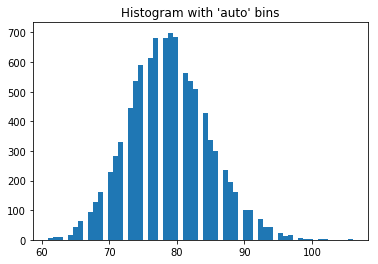

In [5]:
plt.hist(Dist_interg, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [6]:
print('media de la distribución: '+str(np.mean(Dist_interg)))
print('desviación standard de la distribución: '+str(np.std(Dist_interg)))

media de la distribución: 78.8216
desviación standard de la distribución: 5.98262262223


In [7]:
p_v =[]
d = (Dist_interg)
for x in range(0,len(d)):
    if d[x]>=159-63:
        p_v.append(d[x])
        

In [8]:
print(p_v)

[100, 97, 97, 97, 101, 98, 97, 97, 97, 96, 96, 98, 99, 96, 97, 97, 100, 102, 100, 99, 96, 96, 96, 101, 102, 96, 97, 97, 97, 102, 106, 96, 98, 98, 106, 102, 96, 99, 96, 97, 96, 96, 99, 97, 98, 97, 97, 96, 104, 96, 97]


In [9]:
len(p_v)/len(d)

0.0051

In [10]:
nx.draw_kamada_kawai(G, **options)


In [11]:
import random
b = a
for num in b:
    num[1]='f'
indices_m = random.sample(range(62), 34)
for num in indices_m:
    b[num][1] = 'm'
       
for dolph in b:
    G.nodes[dolph[0]]['Gender'] = dolph[1]
    

In [12]:
c=dict(G.edges)
#print(c)
for line in c:
    #print(line[1])
    print(G.nodes[line[1]])


{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'm'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender': 'f'}
{'Gender

In [13]:
G = nx.read_gml('as-22july06.gml')

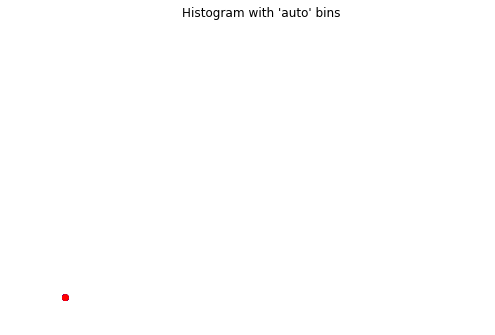

In [14]:
grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]

Datos = np.asarray(grados_G)

plt.hist(Datos, bins='auto',color='red')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

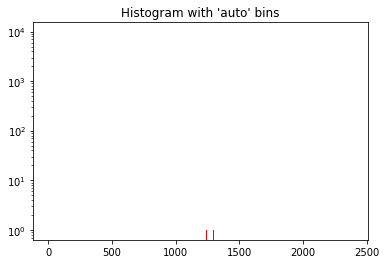

In [15]:
plt.hist(Datos, bins='auto',log=True,color = 'red')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

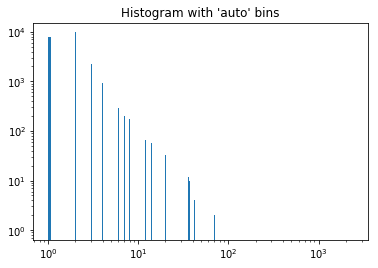

In [16]:
plt.hist(Datos, bins='auto',log=True)  # arguments are passed to np.histogram
plt.xscale('log')
plt.title("Histogram with 'auto' bins")
plt.show()


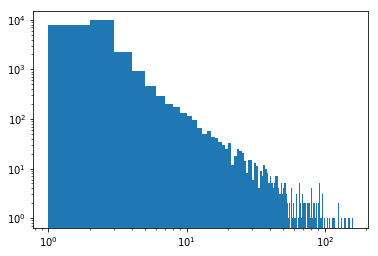

In [17]:
bins = range(0, 160)
plt.xticks(bins, ["2^%s" % i for i in bins])
plt.hist(Datos, log=True, bins=bins)
plt.xscale('log')
plt.show()